<b><font color="red" size="6">ch12. 데이터 프레임과 시리즈(Pandas)</font></b>
- pip install pandas

# 9절. 데이터 그룹화 및 집계

In [3]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets

In [4]:
iris = datasets.get_rdataset('iris').data
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [8]:
print(iris.shape)
iris.iloc[[0,49,50,99,100,149]]

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
99,5.7,2.8,4.1,1.3,versicolor
100,6.3,3.3,6.0,2.5,virginica
149,5.9,3.0,5.1,1.8,virginica


## 9.1 Group by
cf. pivot_table

In [16]:
# 1) 그룹화 방법1 : 문법 
# df.groupby(by=[그룹핑할열])[함수적용해서출력할열들].기초통계함수()
# [함수적용해서출력할열들] : 모든 열이 적용됨
iris_grouped = iris.groupby(iris.Species)
iris_grouped_sum = iris_grouped.sum()
iris_grouped_sum

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [18]:
iris_grouped_sum.loc[['setosa','virginica']]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
virginica,329.4,148.7,277.6,101.3


In [11]:
print(iris_grouped_sum.columns)
print(iris_grouped_sum.index)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')
Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='Species')


In [28]:
iris_grouped_sum.reset_index(inplace=True) # index를 컬럼 데이터로 편입

In [29]:
iris_grouped_sum

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [30]:
# iris_grouped_sum 에서 setosa 그룹함수 결과만 추출
iris_grouped_sum[iris_grouped_sum.Species=='setosa']

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3


In [35]:
# iris_grouped_sum 에서 setosa와 virginica 그룹함수 결과만 추출
iris_grouped_sum[(iris_grouped_sum.Species=='setosa') | (iris_grouped_sum.Species=='virginica')]
iris_grouped_sum[iris_grouped_sum.Species.isin(['setosa', 'virginica'])]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [37]:
# 1) 그룹화 방법 1.1 : 그룹핑할 때 index를 컬럼 데이터로 편입(reset_index 가 필요 없음) 
# df.groupby(by=[그룹핑할열], as_index+False)[함수적용해서출력할열들].기초통계함수()
# [함수적용해서출력할열들] : 모든 열이 적용됨
iris.groupby(iris.Species, as_index=False).sum()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [38]:
display(iris.groupby(iris.Species).sum())

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [40]:
# ★★★★★★★★★★★★★ 이걸 많이 사용함 ★★★★★★★★★★★
display(iris.groupby(['Species']).sum())
# 출력할 결과가 한줄일 경우
display(iris.groupby('Species').sum())

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [46]:
# 종별 Sepal.length 와 Sepal.Width의 평균
# iris.groupby('Species').mean()[['Sepal.Length', 'Sepal.Width']]
iris.groupby('Species')[['Sepal.Length', 'Sepal.Width']].mean() # ★★★★★ key point

,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [47]:
# 종별 Sepal.Length의 합계 1번째 방법
iris.groupby('Species')['Sepal.Length'].sum() # 결과 = 시리즈(1차원)

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [48]:
# 종별 Sepal.Length의 합계 2번째 방법
iris.groupby('Species')[['Sepal.Length']].sum() # 결과 = 데이터프레임

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [54]:
# 1) 그룹화 방법1
# df.groupby(by=[그룹핑할열])[함수적용해서출력할열들].기초통계함수()
# 2) 그룹화 방법2
# df.pivot_table(index='그룹화 할 필드들',
#                              values=['함수적용해서출력할열들'], <- 생략 가능
#                              aggfunc='함수명(기본값:mean)') 
iris.pivot_table(index='Species') # 종별 평균들

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [55]:
# iris.groupby('Species')[['Sepal.Length','Sepal.Width']].sum()
iris.pivot_table(index='Species',
                values=['Sepal.Length','Sepal.Width'],
                aggfunc='sum')

,Sepal.Length,Sepal.Width
Species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


In [56]:
iris.groupby('Species').count() # 결측지를 제외한 데이터 갯수

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [57]:
iris.pivot_table(index='Species',
                aggfunc='count') # 결측치를 제외한 데이터 갯수

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [70]:
import random
random.sample(range(len(iris)), 3)

[77, 83, 3]

In [66]:
iris.shape[1]-1 # iris의 독립변수 열 갯수

4

In [72]:
# 각열에 임의의 행에 결측치를 할당(0번째 열은 결측치 1개, 1번째열은 결측치 2개, ... 3번째 열은 결측치 4개)
for col in range(iris.shape[1]-1):
    iris.iloc[random.sample(range(len(iris)), col+1), col] = np.nan

In [73]:
iris.groupby('Species').count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,49,49,50,50
versicolor,50,49,50,48
virginica,50,50,47,48


In [77]:
result = iris.pivot_table(index='Species',
                    aggfunc='count')
result = result[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
result

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,49,49,50,50
versicolor,50,49,50,48
virginica,50,50,47,48


In [78]:
iris['Species'].value_counts() # 종별 데이터 갯수

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

### 다중열로 그룹화

In [80]:
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [82]:
# iris로 다중열 그룹화 하기 위해서 데이터 추가(num 필드 )
# iris의 행수가 150ro =  Species 3그룹, num 6개 그룹
[[i]*25 for i in range(6)]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]

In [84]:
import numpy as np
iris['num'] = np.ravel([[i]*25 for i in range(6)])
iris.iloc[::10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,NaN,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


In [87]:
# 종별, num별 합계
r = iris.groupby(['Species','num']).sum(0)
r

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0           120.0         83.3          36.5          6.2
           1           124.6         84.4          36.6          6.1
versicolor 2           150.3         67.2         107.8         31.8
           3           146.5         69.1         105.2         31.3
virginica  4           164.4         73.2         130.1         47.2
           5           165.0         75.5         131.4         50.2

In [88]:
r.index

MultiIndex([(    'setosa', 0),
            (    'setosa', 1),
            ('versicolor', 2),
            ('versicolor', 3),
            ( 'virginica', 4),
            ( 'virginica', 5)],
           names=['Species', 'num'])

In [89]:
r.loc[['setosa','virginica']] # setosa와 virginca 만 결과 추출

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species   num                                                      
setosa    0           120.0         83.3          36.5          6.2
          1           124.6         84.4          36.6          6.1
virginica 4           164.4         73.2         130.1         47.2
          5           165.0         75.5         131.4         50.2

In [90]:
# 종별, num별 중위수 ('Species','num')
r = iris.groupby(['Species','num'], as_index=False).median()
r

,Species,num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,5.0,3.40,1.50,0.20
1,setosa,1,5.0,3.40,1.50,0.20
2,versicolor,2,6.1,2.85,4.50,1.35
3,versicolor,3,5.7,2.80,4.20,1.30
4,virginica,4,6.5,2.90,5.60,2.00
5,virginica,5,6.4,3.00,5.55,2.00


In [93]:
# setosa와 virginica 추출
# r[(r['Species']=='setosa') | (r['Species']=='virginica')]
r[ r['Species'].isin(['setosa','virginica'])]

,Species,num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,5.0,3.4,1.50,0.2
1,setosa,1,5.0,3.4,1.50,0.2
4,virginica,4,6.5,2.9,5.60,2.0
5,virginica,5,6.4,3.0,5.55,2.0


In [95]:
# iris.groupby(['Species','num']).sum()
iris.pivot_table(index=['Species','num'],
                aggfunc='sum')

Petal.Length  Petal.Width  Sepal.Length  Sepal.Width
Species    num                                                      
setosa     0            36.5          6.2         120.0         83.3
           1            36.6          6.1         124.6         84.4
versicolor 2           107.8         31.8         150.3         67.2
           3           105.2         31.3         146.5         69.1
virginica  4           130.1         47.2         164.4         73.2
           5           131.4         50.2         165.0         75.5

In [97]:
# 종별 기초 통계량 모두(min, max, count, mean, median, Q1, Q3, std...)
iris.groupby(['Species']).describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  49.000000   50.000000  50.000000
             mean    4.991837    5.936000   6.588000
             std     0.341465    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  49.000000   49.000000  50.000000
             mean    3.422449    2.781633   2.974000
             std     0.380934    0.305964   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.600000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.600000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  47.000000
             mean    1.462000    4.260000   5.563830
             std     0.173664    0.469911   0.554987
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.600000
             75%     1.575000    4.600000   5.850000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   48.000000  48.000000
             mean    0.246000    1.314583   2.029167
             std     0.105386    0.189051   0.278261
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.700000   2.500000
num          count  50.000000   50.000000  50.000000
             mean    0.500000    2.500000   4.500000
             std     0.505076    0.505076   0.505076
             min     0.000000    2.000000   4.000000
             25%     0.000000    2.000000   4.000000
             50%     0.500000    2.500000   4.500000
             75%     1.000000    3.000000   5.000000
             max     1.000000    3.000000   5.000000

In [99]:
g = iris.groupby(['Species'])['Sepal.Length',
                              'Sepal.Width',
                              'Petal.Length',
                              'Petal.Width'].mean()
g

C:\Users\4545\AppData\Local\Temp\ipykernel_17096\1844675862.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g = iris.groupby(['Species'])['Sepal.Length',


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,4.991837,3.422449,1.46200,0.246000
versicolor,5.936000,2.781633,4.26000,1.314583
virginica,6.588000,2.974000,5.56383,2.029167


[범례사용](https://stackoverflow.com/questions/30490740/move-legendoutside-figure-in-seaborn-tsplot)

<function matplotlib.pyplot.show(close=None, block=None)>

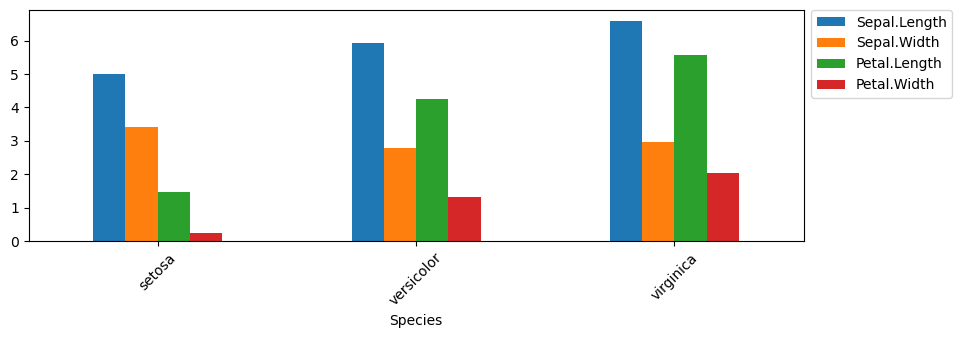

In [103]:
import matplotlib.pyplot as plt
g.plot(kind='bar', figsize=(10,3), rot=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show

In [104]:
# 종별 평균
g = iris.groupby(['Species','num']).mean()
g

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0           5.000     3.470833      1.460000     0.248000
           1           4.984     3.376000      1.464000     0.244000
versicolor 2           6.012     2.800000      4.312000     1.325000
           3           5.860     2.764000      4.208000     1.304167
virginica  4           6.576     2.928000      5.656522     2.052174
           5           6.600     3.020000      5.475000     2.008000

In [106]:
# g의 Level0 인덱스만 그대로 두고, Level1 인덱스를 컬럼값으로 올려
g.unstack()

Sepal.Length                                 Sepal.Width         \
num                   0      1      2     3      4    5           0      1   
Species                                                                      
setosa              5.0  4.984    NaN   NaN    NaN  NaN    3.470833  3.376   
versicolor          NaN    NaN  6.012  5.86    NaN  NaN         NaN    NaN   
virginica           NaN    NaN    NaN   NaN  6.576  6.6         NaN    NaN   

                        ... Petal.Length                         Petal.Width  \
num           2      3  ...            2      3         4      5           0   
Species                 ...                                                    
setosa      NaN    NaN  ...          NaN    NaN       NaN    NaN       0.248   
versicolor  2.8  2.764  ...        4.312  4.208       NaN    NaN         NaN   
virginica   NaN    NaN  ...          NaN    NaN  5.656522  5.475         NaN   

                                                     
num             1      2         3         4      5  
Species                                              
setosa      0.244    NaN       NaN       NaN    NaN  
versicolor    NaN  1.325  1.304167       NaN    NaN  
virginica     NaN    NaN       NaN  2.052174  2.008  

[3 rows x 24 columns]

In [107]:
g.unstack().T

Species             setosa  versicolor  virginica
             num                                 
Sepal.Length 0    5.000000         NaN        NaN
             1    4.984000         NaN        NaN
             2         NaN    6.012000        NaN
             3         NaN    5.860000        NaN
             4         NaN         NaN   6.576000
             5         NaN         NaN   6.600000
Sepal.Width  0    3.470833         NaN        NaN
             1    3.376000         NaN        NaN
             2         NaN    2.800000        NaN
             3         NaN    2.764000        NaN
             4         NaN         NaN   2.928000
             5         NaN         NaN   3.020000
Petal.Length 0    1.460000         NaN        NaN
             1    1.464000         NaN        NaN
             2         NaN    4.312000        NaN
             3         NaN    4.208000        NaN
             4         NaN         NaN   5.656522
             5         NaN         NaN   5.475000
Petal.Width  0    0.248000         NaN        NaN
             1    0.244000         NaN        NaN
             2         NaN    1.325000        NaN
             3         NaN    1.304167        NaN
             4         NaN         NaN   2.052174
             5         NaN         NaN   2.008000

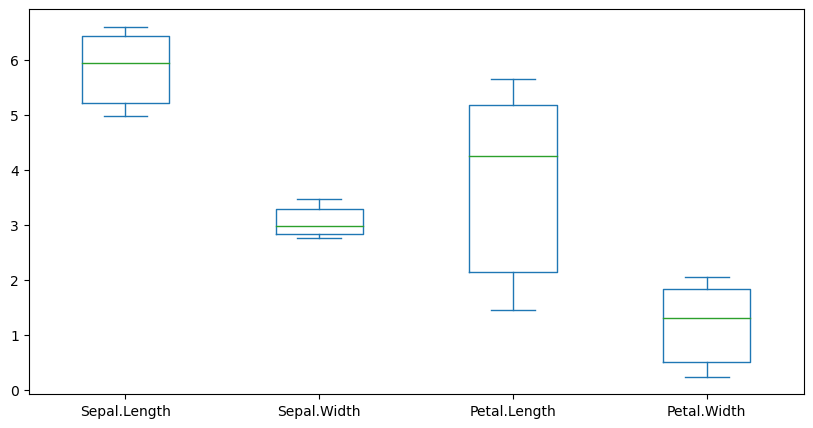

In [108]:
g.plot(kind='box', figsize=(10,5))
plt.show()

## 9.2 그룹간 데이터 처리

In [109]:
iris_grouped = iris.groupby('Species')
iris_grouped

In [112]:
for speciename, group in iris_grouped:
    print(speciename)
    display(group.head(3))
    print('◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎')

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎
versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
52,6.9,3.1,4.9,1.5,versicolor,2


◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎
virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,NaN,2.5,virginica,4
101,5.8,2.7,5.1,1.9,virginica,4
102,7.1,3.0,5.9,2.1,virginica,4


◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎◎


In [117]:
# 종별 임의 표본 5개씩 출력
# iris.sample(5).sort_index()
for idx, (speciename, group) in enumerate(iris_grouped):
    print('{}번째 그룹은 {}'.format(idx, speciename))
    display(group.sample(5).sort_index())

0번째 그룹은 setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
6,4.6,3.4,1.4,0.3,setosa,0
26,5.0,3.4,1.6,0.4,setosa,1
28,5.2,3.4,1.4,0.2,setosa,1
35,5.0,3.2,1.2,0.2,setosa,1
41,4.5,2.3,1.3,0.3,setosa,1


1번째 그룹은 versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
56,6.3,3.3,4.7,1.6,versicolor,2
73,6.1,2.8,4.7,1.2,versicolor,2
85,6.0,3.4,4.5,1.6,versicolor,3
95,5.7,3.0,4.2,1.2,versicolor,3


2번째 그룹은 virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
103,6.3,2.9,5.6,1.8,virginica,4
129,7.2,3.0,5.8,1.6,virginica,5
132,6.4,2.8,5.6,2.2,virginica,5
135,7.7,3.0,6.1,2.3,virginica,5
141,6.9,3.1,5.1,2.3,virginica,5


In [123]:
# 종별 0,10,20,30,40 번째 데이터 출력 : s:0,10,20,30,40행, vc: 50,60,70,80,90 vn:100,110
for speciename, group in iris.groupby('Species'):
    print(speciename, '그룹')
    display(group.iloc[0::10]) # rougp.iloc[0,10,20,30,40]

setosa 그룹


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1


versicolor 그룹


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,NaN,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


virginica 그룹


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,NaN,2.5,virginica,4
110,6.5,3.2,5.1,2.0,virginica,4
120,6.9,3.2,5.7,2.3,virginica,4
130,7.4,2.8,6.1,1.9,virginica,5
140,6.7,3.1,5.6,2.4,virginica,5


## 9.3 데이터 프레임 그룹 인덱싱

In [124]:
t = iris.groupby('Species').take([0,10,20,30,40])
t

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  num
Species                                                                  
setosa     0             5.1          3.5           1.4          0.2    0
           10            5.4          3.7           1.5          0.2    0
           20            5.4          3.4           1.7          0.2    0
           30            4.8          3.1           1.6          0.2    1
           40            5.0          3.5           1.3          0.3    1
versicolor 50            7.0          3.2           4.7          1.4    2
           60            5.0          2.0           3.5          1.0    2
           70            5.9          3.2           4.8          NaN    2
           80            5.5          2.4           3.8          1.1    3
           90            5.5          2.6           4.4          1.2    3
virginica  100           6.3          3.3           NaN          2.5    4
           110           6.5          3.2           5.1          2.0    4
           120           6.9          3.2           5.7          2.3    4
           130           7.4          2.8           6.1          1.9    5
           140           6.7          3.1           5.6          2.4    5

In [125]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,num
0,5.1,3.5,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
20,5.4,3.4,1.7,0.2,0
30,4.8,3.1,1.6,0.2,1
40,5.0,3.5,1.3,0.3,1


## 9.4 레이블 (원핫인코딩)


In [126]:
iris.drop('num', axis=1, inplace=True)

In [127]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,NaN,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [128]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [130]:
# 레이블(원핫인코딩)을 지원하는 패키지 이용
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # 객체
iris['target'] = le.fit_transform(iris.Species)
iris.iloc[::25]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,target
0,5.1,3.5,1.4,0.2,setosa,0
25,5.0,3.0,1.6,0.2,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
75,6.6,3.0,4.4,1.4,versicolor,1
100,6.3,3.3,NaN,2.5,virginica,2
125,7.2,3.2,6.0,1.8,virginica,2


# 10절. 데이터 구조 변경
## 10.1 와이드포맷 <-> 롱포맷
- 판다스 공식 문서에 나오는 melt : https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
- [Tidy Data 란](https://vita.had.co.nz/papers/tidy-data.pdf) 7p

In [136]:
import statsmodels.api as sm
airquality = sm.datasets.get_rdataset('airquality', package='datasets').data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 10.2 melt를 이용한 언피벗팅(와이드포맷 -> 롱포맷)

In [137]:
airquality_melted = airquality.melt(id_vars=['Month','Day'])
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [141]:
airquality_melted = airquality.melt(id_vars=['Month','Day'], 
               var_name='변수명', #melt된 열의 이름
               value_name='값') # 데이터가 된 열의 이름
airquality_melted = airquality_melted.sort_values(['Month','Day'])
airquality_melted.reset_index(drop=True)

,Month,Day,변수명,값
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0
...,...,...,...,...
607,9,29,Temp,76.0
608,9,30,Ozone,20.0
609,9,30,Solar.R,223.0
610,9,30,Wind,11.5


In [143]:
%ls D:\ai\Downloads\shareData

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 149E-6D0A

 D:\ai\Downloads\shareData 디렉터리

2024-11-27  오후 01:10    <DIR>          .
2024-11-27  오후 01:10    <DIR>          ..
2024-11-25  오후 12:44    <DIR>          상가정보
2024-11-18  오후 04:02       290,230,709 소상공인시장진흥공단_상가(상권)정보_20240930.zip
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2024-11-18  오후 03:57           415,443 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv
               3개 파일         290,648,315 바이트
               3개 디렉터리  473,795,637,248 바이트 남음


In [184]:
df_first = pd.read_csv(r'D:\ai\Downloads\shareData\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_last = pd.read_csv(r'D:\ai\Downloads\shareData\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv', encoding='cp949')
df_first.shape, df_list.shape

((17, 22), (9010, 5))

In [182]:
df_first.head(1) # => new_first(지역명, 연도월, 평당분양가격)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [185]:
df_last.head(1) # => new_last(모든면적행만, 지역명,)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841


In [205]:
# 지역 연도월 평당분양가격 식의 롱포맷 데이터로 바꾸기
new_first = df_first.melt(id_vars=['지역'], var_name='연도월', value_name='가격')
new_first.sample(1)

,지역,연도월,가격
285,전남,2015년4월,5940


In [193]:
# 연도월 컬럼을 연도, 월로 분리
def parse_year(x):
    return x.split('년')[0]
parse_year("2013년12월")

'2013'

In [206]:
# first_['연도월'].map(lambda x : int(x.split('년')[0])) # map은 1차원에서 가능
new_first['연도'] = new_first['연도월'].apply(lambda x : int(x.split('년')[0])) # apply는 1, 2차원 모두 가능
new_first.head(1)

,지역,연도월,가격,연도
0,서울,2013년12월,18189,2013


In [200]:
def parse_month(x):
    return x.split('년')[-1]
parse_month("2013년12월")

'12월'

In [207]:
new_first['월'] = new_first['연도월'].map(lambda x : int(x.split('년')[-1].replace('월','')))
new_first.tail(1)

,지역,연도월,가격,연도,월
356,제주,2015년8월,7343,2015,8


In [208]:
new_first['분양가격(제곱미터)'] = new_first['평당분양가격']/3.3
new_first.sample(1)

KeyError: '평당분양가격'

In [209]:
new_first.drop(['연도월','평당분양가격'], axis=1, inplace=True)

KeyError: "['평당분양가격'] not found in axis"

In [210]:
%ls D:\ai\Downloads\shareData

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 149E-6D0A

 D:\ai\Downloads\shareData 디렉터리

2024-11-27  오후 01:10    <DIR>          .
2024-11-27  오후 01:10    <DIR>          ..
2024-11-25  오후 12:44    <DIR>          상가정보
2024-11-18  오후 04:02       290,230,709 소상공인시장진흥공단_상가(상권)정보_20240930.zip
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2024-11-18  오후 03:57           415,443 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv
               3개 파일         290,648,315 바이트
               3개 디렉터리  473,795,608,576 바이트 남음


## 10.3 pivot_table을 이용한 피벗팅(롱포맷 -> 와이드포맷)

In [213]:
airquality_melted = airquality.melt(id_vars=['Month','Day'])
airquality_melted = airquality_melted.sort_values(['Month','Day']).reset_index(drop=True)
airquality_melted.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0


In [215]:
airquality2 = airquality_melted.pivot_table(index=['Month','Day'],
                             columns=['variable'],
                             values=['value'])
airquality2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

In [216]:
airquality2.reset_index()

Month Day value                    
variable           Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [217]:
airquality2.reset_index(level=['Month','Day'],
                       col_level=1,
                       inplace=True)
airquality2.head(1)

value                   
variable Month Day Ozone Solar.R  Temp Wind
0            5   1  41.0   190.0  67.0  7.4

In [219]:
airquality2.columns = airquality2.columns.droplevel(level=0)
airquality2.head(1)

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4


In [220]:
airquality2.columns.name = ''
airquality2.head(1)

,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4


### pivot_table(),pivot()함수의차이

In [222]:
import numpy as np
year = [2020]*3 + [2021]*3
mon = [1, 2, 3]*2
latte = [410,401,402,400,404,405]
americano = [500,483,484,470,486,488]
mocha = [350,299,300,301,302,300]
sales = pd.DataFrame(np.c_[year, mon, latte, americano, mocha],
                    columns=['year','mon','latte','americano','mocha'])
sales

,year,mon,latte,americano,mocha
0,2020,1,410,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,400,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [224]:
sales.groupby(['year'])[['latte','americano','mocha']].sum()

,latte,americano,mocha
year,,,
2020,1213,1467,949
2021,1209,1444,903


In [226]:
result = sales.pivot_table(index='year',
                 values=['latte','americano','mocha'],
                 aggfunc='sum')

In [227]:
result.loc[2021]

americano    1444
latte        1209
mocha         903
Name: 2021, dtype: int32

In [230]:
# pivot()
sales = sales.loc[:, 'year':'latte']
sales

,year,mon,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


In [231]:
sales.pivot(index='year', columns='mon')

latte          
mon      1    2    3
year                
2020   410  401  402
2021   400  404  405

# 11절. 데이터프레임에 함수 적용시키기
- apply(func,axis) : (데이터프레임이나 시리즈 모두 적용 가능)
- applymap(lambda) : 각 요소 별로 적용(데이터 프레임에서만 가능)
- map(lambda) : 각 요소별로 적용(1차원)

## 11.1 apply

In [232]:
member = pd.read_csv('data/ch12_member.csv', comment='#')

In [235]:
member['Birth'].apply(lambda str : str.split('-'))

0    [1999, 01, 01]
1    [1989, 01, 01]
2    [1997, 01, 01]
3    [1959, 01, 01]
4    [1979, 01, 01]
Name: Birth, dtype: object

In [237]:
def get_month(str):
    return int(str.split('-')[1])
get_month('2000-01-01')

1

In [239]:
member[member['Birth'].apply(lambda str : int(str.split('-')[1])) == 1]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 강서구,1989-01-01
2,홍길남,22,nam@hong.com,서울시 강남구,1997-01-01
3,홍길북,60,buk@hong.com,서울시 강북구,1959-01-01
4,홍길중,40,mid@hong.com,부산시 중구,1979-01-01


In [241]:
# ex2 2차원 데이터 프레임에 apply 적용 (axis)
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [246]:
def year_month(series):
    return str(series['연도'])+'년'+str(series['월'])+'월'
year_month(df_last.loc[0])

'2015년10월'

In [248]:
df_last['연도월'] = df_last.apply(lambda series : str(series['연도'])+'년'+str(series['월'])+'월',
             axis=1)

df_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터),연도월
0,서울,모든면적,2015,10,5841,2015년10월


In [250]:
# ex3 iris 데이터의 apply
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [251]:
X = iris.iloc[:, :-1]
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [252]:
X.apply(np.sum, axis=0) # 열별 sum

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
dtype: float64

In [253]:
X.apply(np.sum, axis=1) # 행별 sum

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [254]:
# X의 열별 평균
avg = X.apply(np.average, axis=0)
avg

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [257]:
X.apply(lambda x : x-avg, axis=1) # 행별 평균과의 거리를 소수점 2자리까지 출력

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [258]:
X.apply(lambda x : list(round(x-avg, 2)), axis=1)

0       [-0.74, 0.44, -2.36, -1.0]
1      [-0.94, -0.06, -2.36, -1.0]
2       [-1.14, 0.14, -2.46, -1.0]
3       [-1.24, 0.04, -2.26, -1.0]
4       [-0.84, 0.54, -2.36, -1.0]
                  ...             
145       [0.86, -0.06, 1.44, 1.1]
146       [0.46, -0.56, 1.24, 0.7]
147       [0.66, -0.06, 1.44, 0.8]
148        [0.36, 0.34, 1.64, 1.1]
149       [0.06, -0.06, 1.34, 0.6]
Length: 150, dtype: object

In [259]:
X.applymap(lambda x : x**2)

,sepal_length,sepal_width,petal_length,petal_width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


In [260]:
member[member['Birth'].map(lambda date_str : int(date_str.split('-')[1])) == 1 ]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 강서구,1989-01-01
2,홍길남,22,nam@hong.com,서울시 강남구,1997-01-01
3,홍길북,60,buk@hong.com,서울시 강북구,1959-01-01
4,홍길중,40,mid@hong.com,부산시 중구,1979-01-01


# 12절.일괄 변경하기

## 12.1 fillna (결측지를 어떤 값으로 바꿈)
- 대부분 결측치는 drop하거나, 평균값대체, 최빈값대체, 중위수 대체, 그룹별 평균값, 이전값으로 대체, 다음값으로 대체, 회귀식결과값으로 대체함

In [261]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                 [3,      4, np.nan, 1],
                 [np.nan, 3, np.nan, 5],
                 [np.nan, 3, np.nan, 4]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [263]:
# 모든 결측치를 무조건 0으로 대체
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [264]:
# 이전 값으로
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [265]:
# 결측치를 다음행의 값으로 대체
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [266]:
# 결측치를 특정 대체값으로 바꾸는거
values = {'A':99, 'B':98, 'C':97, 'D':96}
df.fillna(value=values)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,97.0,4


In [268]:
# 결측치를 열별 평균으로 바꾸는거
df.fillna(value=df.mean(axis=0))

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [270]:
df.fillna(value=values,limit=3)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,NaN,4


## 12.2 replace(to_value, new_value, inplace=T/F)
- to_value를 new_value로 변경
- 정규표현식을 이용 가능

In [272]:
s = pd.Series([0, 1, 2, 3, None])
s.replace(np.nan, 0, inplace=True)
s.replace([0,1], 99)

0    99.0
1    99.0
2     2.0
3     3.0
4    99.0
dtype: float64

In [273]:
s = pd.Series([0, 1, 2, 3, None])
s.replace(np.nan, 0)

0    0.0
1    1.0
2    2.0
3    3.0
4    0.0
dtype: float64

In [274]:
df = pd.DataFrame({'A' : ['bat','foo','bait'],
                  'B' : ['abc','ber','xtz']})

In [278]:
df.replace(r'^ba.+$','XXX', regex=True)

,A,B
0,XXX,abc
1,foo,ber
2,XXX,xtz


## 12.3 where(조건), mask(조건)
```
    where(조건) : 조건이 만족하는 요소는 그대로 출력하고 만족하지 않는 요소는 결측치로
    mask(조건) : where의 반대
```

In [279]:
s[s>15]

Series([], dtype: float64)

## 12.4 dropna
- 결측치가 있는 데이터 누락(행기준, 열기준)

In [280]:
df = pd.DataFrame({'name' : ['홍','김','이', np.nan],
                  'age' : [np.nan, 20, 30, np.nan],
                  'born' : ['서울','부산',np.nan, np.nan]})
df

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,NaN,NaN


In [281]:
df.dropna() # 결측치가 하나라도 있는 행은 제거 inplace=True가 아니면 return

,name,age,born
1,김,20.0,부산


In [282]:
df.dropna(subset=['name','age']) # 결측치가 name 여로가 age열에 결측치가 하나라도 있는 행 제거

,name,age,born
1,김,20.0,부산
2,이,30.0,NaN


In [283]:
df.dropna(how='all') # 모두 결측치가 있는 행만 삭제

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN


In [284]:
df.dropna(axis=1) # 결측치가 하나라도 있는 열을 모두 삭제

""
0
1
2
3


In [ ]:
df.dropna(axis=1) # 모두 결측치인 열만 삭제

## 12절 연습문제

In [286]:
import seaborn as sns
iris = sns.load_dataset('iris')
#1단계
import random
print(random.sample(range(150),20))

[148, 136, 61, 45, 82, 5, 111, 2, 18, 145, 38, 139, 32, 26, 8, 88, 79, 75, 54, 20]


In [287]:
# 2 단계 : 결측치가 있는 iris데이터를 출력한다 결측치 여부 return 함수 : isna(), isnull()
# iris['sepal_length'].isna()
iris

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal_length, Length: 150, dtype: bool

In [290]:
# 3단계 : 결측치를 열평균으로 대체된 iris데이터를 출력한다(inplace=True)
X = iris.iloc[:, :-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
